In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# r = distance from the center (radius)
# θ = angle from the horizontal axis

def generate_spiral(n, noise=0.2): #Without noise → all points lie exactly on the spiral
    theta = np.sqrt(np.random.rand(n)) * 2 * np.pi #angel of the spiral
    r = 2 * theta  #radius (distance from the center)
    x1 = r * np.cos(theta) + noise * np.random.randn(n) #x-coordinate of each point in the spiral
    x2 = r * np.sin(theta) + noise * np.random.randn(n) #r * np.sin(theta) → convert polar to Cartesian
    return np.c_[x1, x2] #column stack

X0 = generate_spiral(500) #first spiral
X1 = -generate_spiral(500) #flipped another spiral

X = np.vstack([X0, X1])
y = np.array([0]*500 + [1]*500)



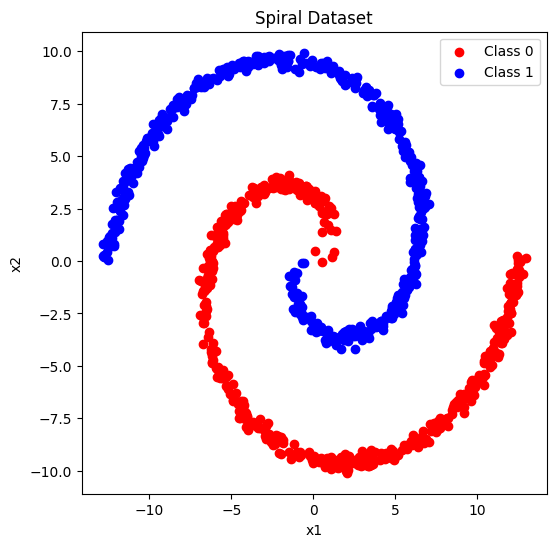

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Visualize the spirals
plt.figure(figsize=(6,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')

plt.title("Spiral Dataset")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)


ml_model = LogisticRegression()
ml_model.fit(X_train, y_train)

print("ML Train Accuracy:", ml_model.score(X_train, y_train))
print("ML Test Accuracy :", ml_model.score(X_test, y_test))


ML Train Accuracy: 0.70625
ML Test Accuracy : 0.765


#DL Model

In [ ]:
dl_model = Sequential([
    Dense(256, activation='relu', input_shape=(2,)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

dl_model.fit(X_train, y_train, epochs=50, verbose=0)

train_loss, train_acc = dl_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = dl_model.evaluate(X_test, y_test, verbose=0)

print("DL Train Accuracy:", train_acc)
print("DL Test Accuracy :", test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DL Train Accuracy: 1.0
DL Test Accuracy : 1.0
